In [59]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-bright')

In [2]:
df = import_export.import_catalog(location='data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
                                                        , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
                                                        , 'depth_error', 'mag_err'])

noto_hanto = {'coordinates':(136.686000, 37.220667), 'time':'2007-03-25 00:41:57.909996'
              , 'tz':'UTC', 'magnitude':6.9, 'name':'Noto Hanto', 'focal_mech':[34, 40, 108]}
western_tottori = {'coordinates':(133.349, 35.274167), 'time':'2000-10-06 04:30:17.940011'
                   , 'tz':'UTC', 'magnitude':6.7, 'name':'Western Tottori', 'focal_mech':[331, 83, 1]}
sugura_bay = {'coordinates':(138.499333, 34.786167), 'time':'2009-08-10 20:07:05.740017'
              , 'tz':'UTC', 'magnitude':6.5, 'name':'Suruga Bay', 'focal_mech':[88, 51, 63]}
iwaki = {'coordinates':(140.672667, 36.945667), 'time':'2011-04-11 08:16:12.020008'
         , 'tz':'UTC', 'magnitude':6.6, 'name':'Iwaki', 'focal_mech':[139    ,53   ,-75]}
iwate_miyage = {'coordinates':(140.880667, 39.029833), 'time':'2008-06-13 23:43:45.359992'
                , 'tz':'UTC', 'magnitude':6.8, 'name':'Iwate Miyage', 'focal_mech':[17  ,  42  , 87]}
kumamoto = {'coordinates':(130.763, 32.7545), 'time':'2016-04-14 12:26:00'
            , 'tz':'UTC', 'magnitude':7.0, 'name':'Kumamoto', 'focal_mech':[128  , 71 , -14]}
tohoku = {'coordinates':(142.861000, 38.103500), 'time':'2011-03-11 05:46:18.119983'
          , 'tz':'UTC', 'magnitude':9.0, 'name':'Tohoku-oki'}
eqs = {'suruga-bay':sugura_bay, 'iwaki':iwaki, 'iwate-miyage':iwate_miyage
      ,'kumamoto':kumamoto, 'noto-hanto':noto_hanto, 'western-tottori':western_tottori}

In [52]:
data = polygon_selection.get_node_data(data=df, node=kumamoto['coordinates'], radius=25, m=1)
data = data[data.depth <= 25]

In [54]:
magnitude_cutoff = sorted(data.mag.unique())

# Kumamoto case study

Recall the parameter search plots that I showed prior, It was asked to plot the frequency magnitude diagrams to demonstrate that the fits were good or not good. To generate the fit, we assume a very minimum magnitude of M0.5 and then calculate the maximum curvature. The animation shows every fit line for every combination of search parameter (catalog start time and selection radius).

This every frequency magnitude diagram (>1000) associated with the Kumamoto parameter search plot (fig. 2).

## figure 1
![Imgur](http://i.imgur.com/ZSZ0nKH.gif)


## figure 2
![Imgur](http://i.imgur.com/kyd7VWf.png)

## figure 3
![Imgur](http://i.imgur.com/pdbuciV.png)
I decided that perhaps instead of assuming a minimum magnitude and calculating the maximum curvature I could calculate the b-value for the raw catalog, and then start cutting the catalog from the left (i.e., the smallest magnitude) until the b-value stabilized. Then finding the minimum b-value difference we can say that the magnitude of completeness is where the stabilization first starts. This is represented in the plots below. The highlighted portion (red) shows the local minimum in b-value difference and where it stabilizes.

If we compare this plot to the red and blue plot in figure 3 we can see that (in the kumamoto case) both at high radii and high Mc the b-value increases.

The final plots are a selection of frequency magnitude diagrams for different magnitude of completeness.


/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/max/pymap3/utilities/stats.py:45: RuntimeWarning: invalid value encountered in true_divide
  b_stddev = square_every_value((magnitudes - average).sum()) / (length * (length - 1))
/home/max/pymap3/utilities/stats.py:47: RuntimeWarning: divide by zero encountered in log10
  a_value = np.log10(length) + b_value * minimum


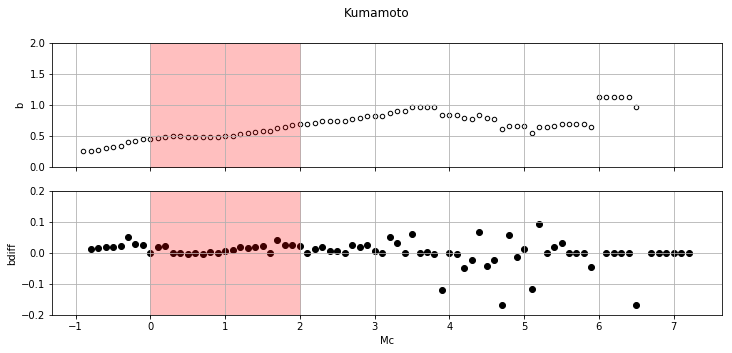

In [56]:
fmds = []
cutoff_min = sorted(data.mag.unique())[0]
cutoffs = np.linspace(cutoff_min, 10.0, (10. - cutoff_min)/0.1 + 1)



for mc in cutoffs:
    fmds.append(stats.fmd_values(data[data.mag >= mc].mag) + (mc,))
fmds = np.array(fmds)
bdf = pd.DataFrame(fmds, columns=['a', 'b', 'bstd', 'n', 'Mc'])

fig, (ax, ax2) = plt.subplots(2,1, figsize=(12,5), sharex=True)
bdf.plot(kind='scatter', x='Mc', y='b', ax=ax, color='None', edgecolor='black')
ax.set_ylim(0,2)
ax.grid(True)


bdiff = bdf.b.diff()
ax2.scatter(x=bdf.Mc.values, y=bdiff, color='black')
ax2.set_ylim(-0.2, 0.2)
ax2.grid(True)
ax2.set_ylabel('bdiff')
ax2.set_xlabel('Mc')
fig.suptitle('Kumamoto')

ax.fill_between([0, 2], [2,2], alpha=0.25, color='red')
ax2.fill_between([0, 2], [-2,-2], alpha=0.25, color='red')
ax2.fill_between([0, 2], [2,2], alpha=0.25, color='red')

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


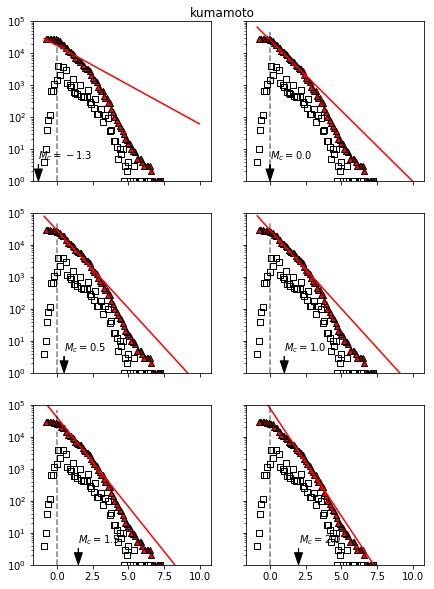

In [58]:
cutoff =  sorted(data.mag.unique())[0]
bins = np.linspace(cutoff, 10.0, (10. - cutoff)/0.1 + 1)


fig, ax = plt.subplots(3,2, figsize=(7,10), sharey=True, sharex=True)
ax = [item for sublist in ax for item in sublist]


cutoffs = [-1.3, 0.0, 0.5, 1.0, 1.5, 2.0]

for m, c in enumerate(cutoffs):

    data_with_cutoff = data[data.mag >= c]

    a, b, bstd, n = stats.fmd_values(data_with_cutoff.mag)

    hist, edges = np.histogram(a=data.mag.values,  bins=bins)
    chist = np.cumsum(hist[::-1])

    ax[m].scatter(x=edges[:-1], y=hist, marker='s', edgecolors='black', c='None')
    ax[m].scatter(x=edges[::-1][:-1], y=chist, marker='^', edgecolors='black', c='red')
    ax[m].set_yscale('log')
    # ax.set_ylim(1e0, 1.75 * 10**a)
    # ax.set_xlim(0, 10)

    x = np.arange(cutoff, 10, 0.01)

    y = 10**(a - b * x)

    ax[m].plot(x, y, color='red')


    ax[m].plot([0, 0], [1e0, 1.75*10**a], linestyle='--', color='black', alpha=0.5)
    ax[m].annotate('$M_c={mc}$'.format(mc=round(c,2)), xy=(c, 1e0), xytext=(c, 5e0)
                ,arrowprops=dict(facecolor='black', shrink=0.005
                ,width=0.2, headwidth=8))
    
    ax[m].set_ylim(1e0, 1e5)
fig.suptitle('kumamoto', y=0.9)